In [12]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import losses, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, MaxPooling2D, Conv2D, InputLayer, ReLU



import warnings
warnings.filterwarnings('ignore')

In [13]:
# Set a seed value
seed_value= 12321 

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

In [14]:
def read_images(folder):
    images = []
    for filename in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ##convert images from BGR to RGB
        if img is not None:
            img = cv2.resize(img, dsize = (70,140), interpolation=cv2.INTER_CUBIC)
            y,h,x,w = 0,100,0,70
            img = img[y:y+h, x:x+w]
            img = img/255
            images.append(img)
            
    return images

In [15]:
train_notflip = read_images("../images/training/0")
train_flip = read_images("../images/training/1")

X_noflip = np.array(train_notflip)
X_flip = np.array(train_flip)

y_noflip = np.zeros(X_noflip.shape[0])
y_flip = np.ones(X_flip.shape[0])

X = np.concatenate((X_noflip,X_flip ))
y = np.concatenate((y_noflip, y_flip))

X.shape, y.shape

100%|██████████| 1162/1162 [00:38<00:00, 30.21it/s]


((2392, 100, 70, 3), (2392,))

In [16]:
test_notflip = read_images("../images/testing/0")
test_flip = read_images("../images/testing/1")

X_test_noflip = np.array(test_notflip)
X_test_flip = np.array(test_flip)
y_test_noflip = np.zeros(X_test_noflip.shape[0])
y_test_flip = np.ones(X_test_flip.shape[0])


X_test = np.concatenate((X_test_noflip,X_test_flip ))
y_test = np.concatenate((y_test_noflip, y_test_flip))
X_test.shape, y_test.shape


100%|██████████| 290/290 [00:09<00:00, 31.55it/s]


((597, 100, 70, 3), (597,))

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1913, 100, 70, 3), (479, 100, 70, 3), (1913,), (479,))

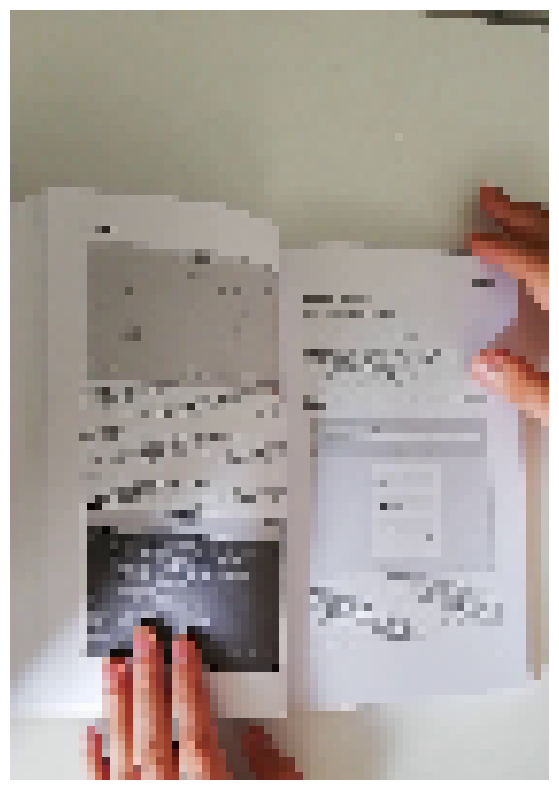

In [18]:
# visualizing the image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(1,1,1)
plt.imshow(X_train[1], cmap="gray")
plt.axis('off')
plt.show()


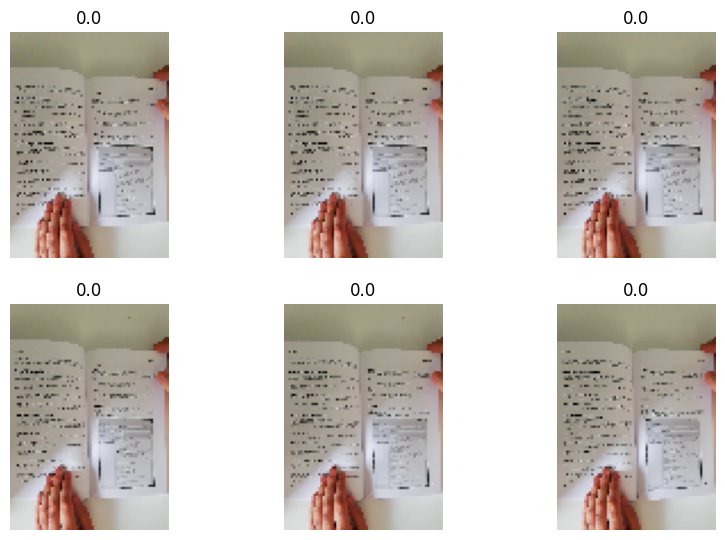

In [19]:
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.axis("off")

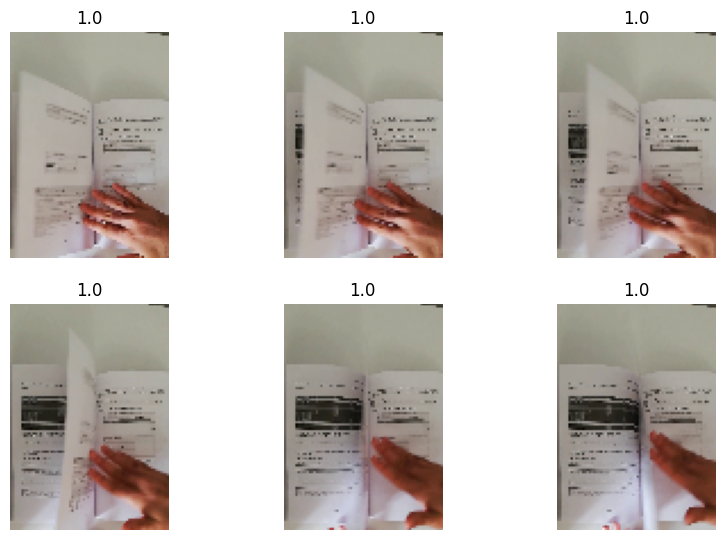

In [20]:
plt.figure(figsize=(10, 10))
for i in range(-6, 0):
    ax = plt.subplot(3, 3, 0 - i)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.axis("off")

In [21]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation = ReLU(), padding = 'same', input_shape=(100, 70,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation=ReLU()))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.001)

model.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [22]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 100, 70, 32)       416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 35, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 56000)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3584064   
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,584,545
Trainable params: 3,584,545
Non-trainable params: 0
____________________________________________

In [23]:
history_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=12, batch_size=64, verbose=1)


Epoch 1/12
30/30 [==============================] - 5s 144ms/step - loss: 0.9499 - accuracy: 0.4909 - val_loss: 0.6419 - val_accuracy: 0.5470
Epoch 2/12
30/30 [==============================] - 4s 147ms/step - loss: 0.5547 - accuracy: 0.7209 - val_loss: 0.5275 - val_accuracy: 0.6681
Epoch 3/12
30/30 [==============================] - 4s 142ms/step - loss: 0.4100 - accuracy: 0.8458 - val_loss: 0.3341 - val_accuracy: 0.9228
Epoch 4/12
30/30 [==============================] - 4s 132ms/step - loss: 0.2869 - accuracy: 0.9268 - val_loss: 0.2350 - val_accuracy: 0.9687
Epoch 5/12
30/30 [==============================] - 4s 136ms/step - loss: 0.2061 - accuracy: 0.9571 - val_loss: 0.1822 - val_accuracy: 0.9603
Epoch 6/12
30/30 [==============================] - 4s 137ms/step - loss: 0.1665 - accuracy: 0.9645 - val_loss: 0.1393 - val_accuracy: 0.9812
Epoch 7/12
30/30 [==============================] - 4s 138ms/step - loss: 0.1258 - accuracy: 0.9770 - val_loss: 0.1204 - val_accuracy: 0.9729
Epoch 

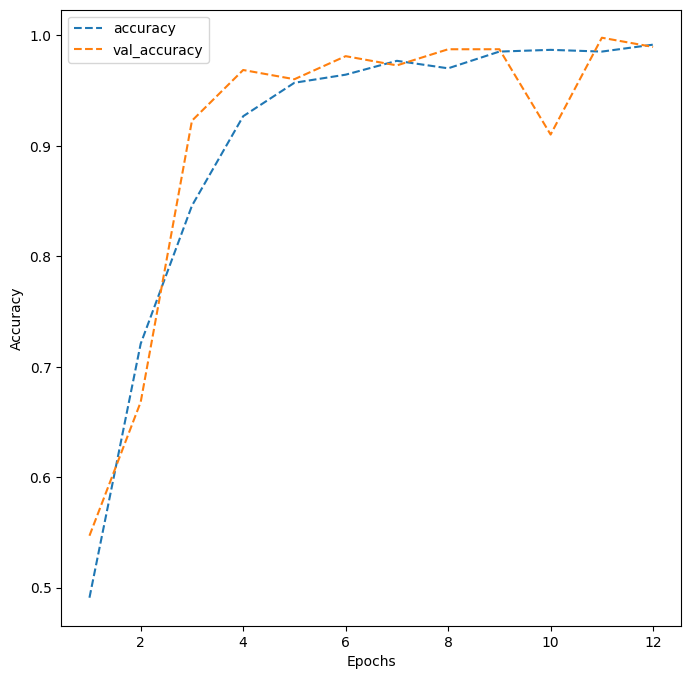

In [24]:
# plotting the accuracies

dict_hist = history_model.history
list_ep = [i for i in range(1,13)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'
                          ],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [25]:
test_pred = model.predict(X_test, verbose=1)


# Choose a threshold of 0.5
threshold = 0.5

# Convert probabilities to predicted labels
test_pred_labels = np.where(test_pred >= threshold, 1, 0)
#test_pred_labels1

19/19 [==============================] - 0s 18ms/step


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       307
         1.0       0.99      0.98      0.99       290

    accuracy                           0.99       597
   macro avg       0.99      0.99      0.99       597
weighted avg       0.99      0.99      0.99       597



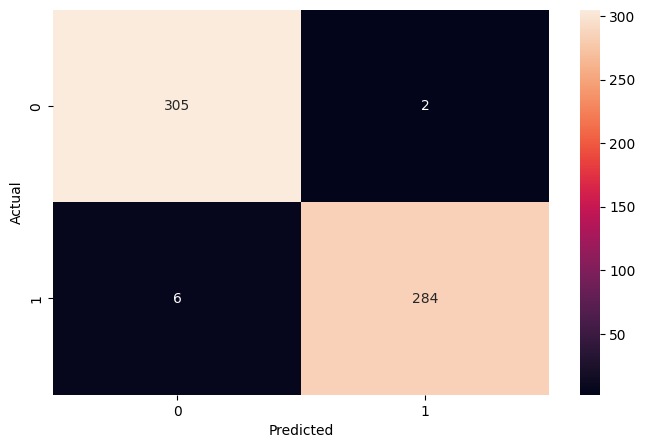

In [34]:

#Printing the classification report
print(classification_report(y_test, test_pred_labels))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred_labels)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
model.save("../models/ggg.h5")

In [3]:
## 3 files read process, train inference, then we need file dor pre trained model

import cv2
import os
from tqdm import tqdm

class ImageProcessor:
    def __init__(self, size=(70, 140)):
        self.size = size
        self.crop_coords = (0, 100, 0, 70)

    def process(self, folder):
        images = []
        for filename in tqdm(os.listdir(folder)):
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ##convert images from BGR to RGB
            if img is not None:
                img = cv2.resize(img, dsize=self.size, interpolation=cv2.INTER_CUBIC)
                y, h, x, w = self.crop_coords
                img = img[y:y+h, x:x+w]
                img = img/255
                images.append(img)
                
        

        return images

In [4]:
## Train the model 


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU
from tensorflow.keras import losses, optimizers
import numpy as np

class CNNModel:
    def __init__(self, input_shape=(100, 70, 3)):
        self.model = Sequential()
        self.model.add(Conv2D(32, (2, 2), activation=ReLU(), padding='same', input_shape=input_shape))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(64, activation=ReLU()))
        self.model.add(Dense(1, activation='sigmoid'))
        adam = optimizers.Adam(learning_rate=0.001)
        self.model.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])
    
    def train(self, X_train, y_train, X_val, y_val, epochs=12, batch_size=64, verbose=1):
        self.history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    def predict(self, X):
        return self.model.predict(X)        
    



In [5]:

processor = ImageProcessor()

X_noflip =np.array(processor.process('../images/training/0'))
X_flip = np.array(processor.process('../images/training/1'))

y_noflip = np.zeros(X_noflip.shape[0])
y_flip = np.ones(X_flip.shape[0])

X = np.concatenate((X_noflip,X_flip ))
y = np.concatenate((y_noflip, y_flip))

X.shape, y.shape

100%|██████████| 1162/1162 [00:35<00:00, 32.73it/s]


((2392, 100, 70, 3), (2392,))

In [6]:
X_test_noflip = np.array(processor.process('../images/testing/0'))
X_test_flip = np.array(processor.process('../images/testing/1'))

y_test_noflip = np.zeros(X_test_noflip.shape[0])
y_test_flip = np.ones(X_test_flip.shape[0])


X_test = np.concatenate((X_test_noflip,X_test_flip ))
y_test = np.concatenate((y_test_noflip, y_test_flip))
X_test.shape, y_test.shape


100%|██████████| 290/290 [00:08<00:00, 32.57it/s]


((597, 100, 70, 3), (597,))

In [7]:
X.shape, y.shape

((2392, 100, 70, 3), (2392,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2, shuffle=True)


In [9]:
cnn = CNNModel()
cnn.train(X_train, y_train, X_val, y_val)

Epoch 1/12
30/30 [==============================] - 5s 128ms/step - loss: 0.7901 - accuracy: 0.5363 - val_loss: 0.6613 - val_accuracy: 0.6785
Epoch 2/12
30/30 [==============================] - 4s 139ms/step - loss: 0.6114 - accuracy: 0.6858 - val_loss: 0.5697 - val_accuracy: 0.7370
Epoch 3/12
30/30 [==============================] - 4s 138ms/step - loss: 0.4871 - accuracy: 0.7987 - val_loss: 0.4328 - val_accuracy: 0.8580
Epoch 4/12
30/30 [==============================] - 4s 143ms/step - loss: 0.3904 - accuracy: 0.8395 - val_loss: 0.3397 - val_accuracy: 0.9311
Epoch 5/12
30/30 [==============================] - 4s 145ms/step - loss: 0.2732 - accuracy: 0.9300 - val_loss: 0.3300 - val_accuracy: 0.8392
Epoch 6/12
30/30 [==============================] - 4s 137ms/step - loss: 0.1971 - accuracy: 0.9561 - val_loss: 0.1850 - val_accuracy: 0.9749
Epoch 7/12
30/30 [==============================] - 4s 131ms/step - loss: 0.1604 - accuracy: 0.9603 - val_loss: 0.1809 - val_accuracy: 0.9415
Epoch 

In [10]:
test_pred = cnn.predict(X_test)


# Choose a threshold of 0.5
threshold = 0.5

# Convert probabilities to predicted labels
test_pred_labels = np.where(test_pred >= threshold, 1, 0)
#test_pred_labels1

19/19 [==============================] - 0s 18ms/step


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       307
         1.0       1.00      0.95      0.97       290

    accuracy                           0.97       597
   macro avg       0.97      0.97      0.97       597
weighted avg       0.97      0.97      0.97       597



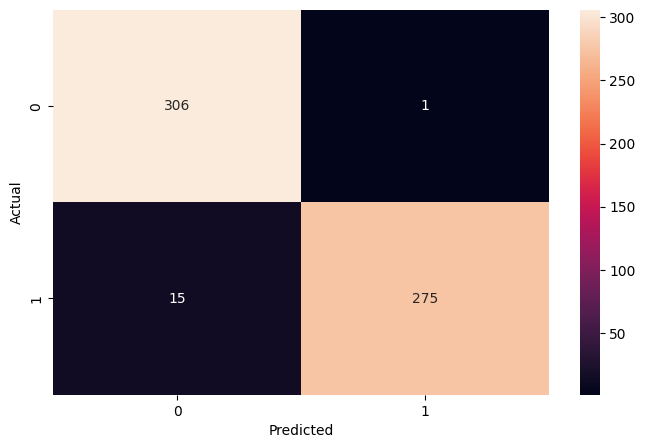

In [11]:

#Printing the classification report
print(classification_report(y_test, test_pred_labels))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred_labels)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
tf.keras.backend.clear_session()

In [28]:
print(classification_report(y_test, test_pred_labels))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       307
         1.0       0.99      0.98      0.99       290

    accuracy                           0.99       597
   macro avg       0.99      0.99      0.99       597
weighted avg       0.99      0.99      0.99       597

